In [48]:
# Packages are imported
import pandas as pd
import numpy as np
from numpy import argmax
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [ ]:
# The CSV file with all of the data is read and stored in sim
sim = pd.read_csv("sim.csv")

In [ ]:
# The average RSRP of drone data points, average RSRQ of drone points,
# and that for non-drone data points are seperated into individual arrays
terrestrial_avgRSRP = []
terrestrial_avgRSRQ = []
drone_avgRSRP = []
drone_avgRSRQ = []
for index, row in sim.iterrows():
    if row.drone == 0:
        terrestrial_avgRSRP.append(row.avgRSRP) 
        terrestrial_avgRSRQ.append(row.avgRSRQ)
    else:
        drone_avgRSRP.append(row.avgRSRP) 
        drone_avgRSRQ.append(row.avgRSRQ)

In [49]:
### Code to separate drone data by altitude of collection
#terrestrial_avgRSRP = []
#terrestrial_avgRSRQ = []
#sixty_avgRSRP = []
#sixty_avgRSRQ = []
#hundred_avgRSRP = []
#hundred_avgRSRQ = []
#for index, row in sim.iterrows():
#    if row.altitude == 0:
 #       terrestrial_avgRSRP.append(row.avgRSRP) 
  #      terrestrial_avgRSRQ.append(row.avgRSRQ)
   # elif row.altitude == 60:
    #    sixty_avgRSRP.append(row.avgRSRP)
     #   sixty_avgRSRQ.append(row.avgRSRQ)
#    else:
 #       hundred_avgRSRP.append(row.avgRSRP) 
  #      hundred_avgRSRQ.append(row.avgRSRQ)

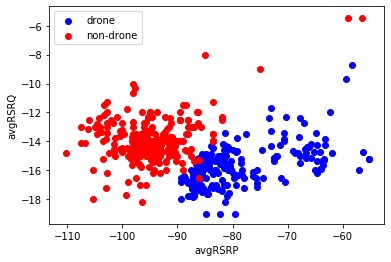

In [50]:
# Average RSRP and Average RSRQ are plotted in a scatter plot.
# Blue points represent drone data points.
# Red points represent non-drone data points
plt.xlabel('avgRSRP')
plt.ylabel('avgRSRQ')
ax = plt.gca()
ax.scatter(drone_avgRSRP, drone_avgRSRQ, color="b", label = 'drone')
ax.scatter(terrestrial_avgRSRP, terrestrial_avgRSRQ, color="r", label = 'non-drone')
ax.legend()

In [51]:
# The dependent variable is the true classification of the data point,
# drone or non-drone. The predictor variables are all other data
# parameters.
y = sim.drone.copy()
X = sim.drop(['drone'], axis=1)
features = X.columns
features = list(features)
print(features)

['avgRSRP', 'towers', 'RSSI', 'avgRSRQ']


In [52]:
# The data set is split, randomly, into a data set to be used to train the model
# and a data set used to test and evaluate the model. The data set is split such
# that 80% of the data is used for testing and the remaining 20% of the data is
# used to test the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [53]:
# The Decision Tree Model is instantiated and trained with the training data
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\12148\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# Predictions are made on the testing data set using the model
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']

In [55]:
# Performance metrics are printed
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.968421052631579
Precision: 0.95
Recall: 0.9743589743589743


[[9.99979891e-01 2.01085984e-05]
 [5.89880882e-01 4.10119118e-01]
 [1.35475122e-04 9.99864525e-01]
 [9.99710633e-01 2.89367105e-04]
 [1.49959054e-01 8.50040946e-01]
 [2.64263459e-07 9.99999736e-01]
 [1.28279317e-03 9.98717207e-01]
 [7.09613907e-08 9.99999929e-01]
 [4.48131274e-04 9.99551869e-01]
 [4.87541203e-02 9.51245880e-01]
 [4.24110412e-02 9.57588959e-01]
 [9.98159837e-01 1.84016336e-03]
 [8.40977483e-01 1.59022517e-01]
 [1.12046106e-02 9.88795389e-01]
 [1.00000000e+00 3.61447807e-10]
 [9.99691658e-01 3.08342462e-04]
 [9.99683369e-01 3.16630895e-04]
 [9.99963951e-01 3.60494369e-05]
 [4.87098287e-07 9.99999513e-01]
 [4.96493060e-05 9.99950351e-01]
 [9.36320938e-01 6.36790617e-02]
 [5.00459737e-08 9.99999950e-01]
 [9.99898269e-01 1.01731174e-04]
 [9.97109305e-01 2.89069466e-03]
 [9.96190503e-01 3.80949663e-03]
 [9.90764310e-02 9.00923569e-01]
 [2.31375677e-01 7.68624323e-01]
 [3.31613687e-06 9.99996684e-01]
 [5.19548839e-03 9.94804512e-01]
 [9.99737637e-01 2.62362946e-04]
 [9.536243

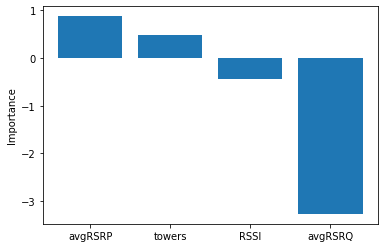

In [56]:
# Predict probability that SIM is drone for each data point in test set
print(model.predict_proba(X_test))

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s: , Score: %0.5f' % (features[i],v))

# plot feature importance
plt.bar(features, importance)
plt.ylabel('Importance')
plt.show()

Best Threshold=0.410119, F-Score=0.975


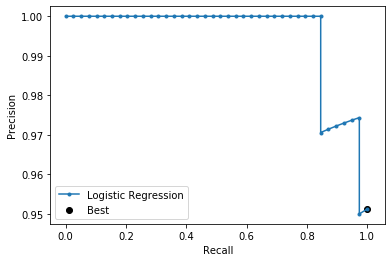

In [57]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
plt.plot(recall, precision, marker='.', label='Logistic Regression')
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.410119, G-Mean=0.982


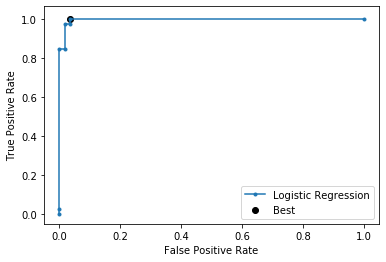

In [58]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate pr-curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
# locate the index of the largest f score
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

* Something to consider later * 

By selecting the "optimal" threshold like this, you are utilizing information post-learning, which spoils your test set (i.e., your test or validation set no longer provides an unbiased estimate of out-of-sample error). You may therefore be inducing additional over-fitting unless you choose the threshold inside a cross-validation loop on your training set only, then use it and the trained classifier with your test set.


Text(0.5, 15.0, 'Predicted')

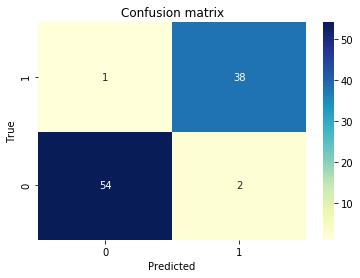

In [59]:
# Confusion matrix is created
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)


# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')